# **Corpus- Applications Reviews**

# **Research Question**- How do the most often mentioned terms in user reviews of mobile applications reflect user sentiment?

# **Objectives:**
 1. Identify commonly mentioned terms in user reviews of different mobile applications (shopping, entertainment, travel, food delivery).
 2. Analyze the sentiment associated with these frequently mentioned terms to determine whether they reflect positive, negative, or neutral emotions.
 3. Understand user concerns and preferences by examining key terms that appear in different sentiment categories.
 4. Compare sentiment trends across different types of mobile applications to observe variations in user experiences.
 5. Provide visual representations (bar charts, word clouds, pie charts, heatmaps) of frequently mentioned terms and their associated sentiment.

### **Methodology**: KWIC, Sentiment Analysis and Frequent Word Analysis

In [32]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

!pip install pdfplumber
!pip install nltk
!pip install wordcloud
!pip install seaborn
!pip install matplotlib
!pip install vaderSentiment

import os
import pdfplumber  # for PDF text extraction
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Set folder path (Make sure 'app_reviews' folder is in Google Drive)
folder_path = "/content/drive/My Drive/app_reviews"
files = os.listdir(folder_path)

# Step 3: Read & Extract Text from PDFs and TXT Files
def extract_text_from_pdf(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + " "  # Extract text from each page
    return text.strip()

def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()

corpus = []
for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith(".pdf"):
        corpus.append(extract_text_from_pdf(file_path))
    elif file.endswith(".txt"):
        corpus.append(read_text_file(file_path))

# Combine all text into one large corpus
corpus_text = " ".join(corpus)

# Step 4: Text Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    return [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words and word.isalpha()]

processed_words = preprocess_text(corpus_text)

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


The project utilizes various libraries and tools for text processing and sentiment analysis. It accesses files stored in Google Drive, enabling the reading of datasets and saving output files. The pdfplumber library extracts text from PDFs, while nltk provides Natural Language Processing (NLP) tools, including tokenization (punkt_tab), stopword removal (stopwords), and lexical analysis (wordnet). The string module helps with text processing, such as removing punctuation. Visualization is enhanced using matplotlib.pyplot and seaborn, which create statistical plots, and wordcloud.WordCloud, which generates word clouds. Sentiment analysis is conducted using VADER (vaderSentiment), a pre-trained sentiment analysis tool, with SentimentIntensityAnalyzer classifying text as positive, negative, or neutral, leveraging the vader_lexicon.

The program defines the path where app review files are stored in Google Drive and retrieves a list of files using os.listdir(folder_path). It processes text files differently based on their format: PDFs are read using pdfplumber, extracting text from each page and concatenating it into a single string, while TXT files are read using encoding="utf-8" to handle special characters like emojis. The script iterates through all files in the folder, extracting text using either extract_text_from_pdf() for PDFs or read_text_file() for TXT files. The extracted content is stored in a corpus list and combined into a single large text corpus, which is used for text analysis, sentiment analysis, and visualization in later steps.











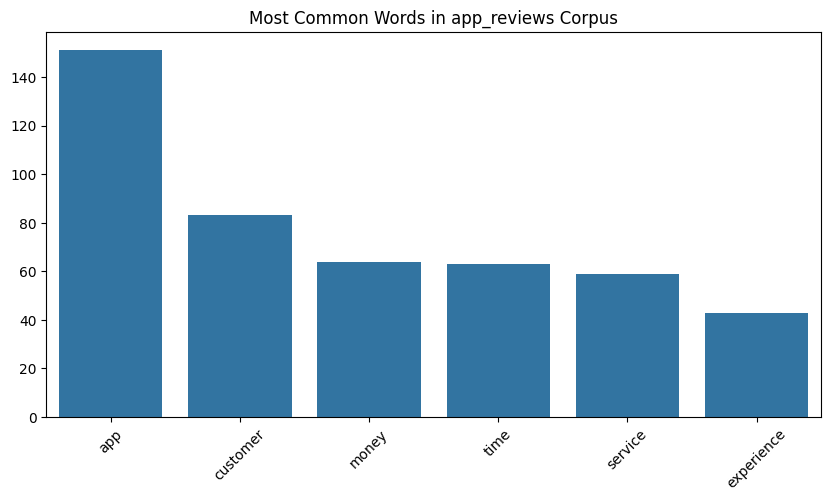

In [33]:
# Step 5: Frequent Word Analysis
from collections import Counter

word_freq = Counter(processed_words)
common_words = word_freq.most_common(6)

# Plot Most Common Words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.xticks(rotation=45)
plt.title("Most Common Words in app_reviews Corpus")
plt.show()

The Counter module from collections is used to count the occurrences of words in the processed text. The function Counter(processed_words) generates a dictionary-like object where keys represent words and values denote their frequency counts. To identify the most frequently used words, word_freq.most_common(6) retrieves the top six words along with their counts.

For visualization, plt.figure(figsize=(10,5)) creates a figure with a width of 10 inches and a height of 5 inches for better clarity. The x and y lists extract words and their corresponding frequencies from common_words using list comprehensions: x = [word[0] for word in common_words] and y = [word[1] for word in common_words]. A bar chart is created using sns.barplot(...), displaying word frequencies, and plt.xticks(rotation=45) rotates x-axis labels by 45 degrees to prevent overlapping. Finally, a title is added to improve readability, and plt.show() renders the bar chart.

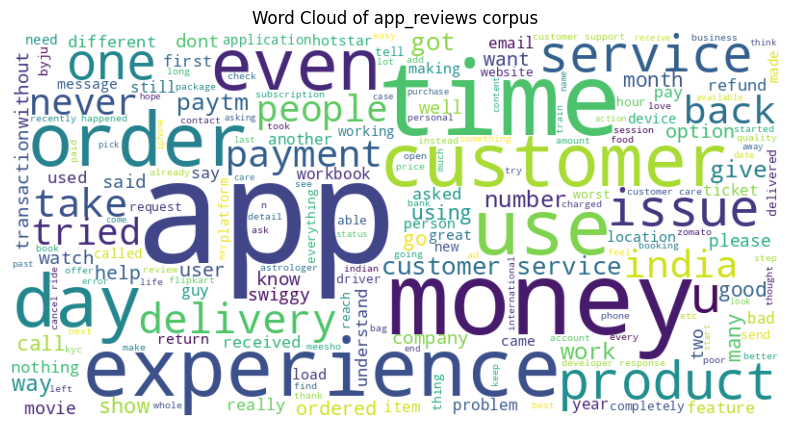

In [34]:
# Step 6: Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(processed_words))

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of app_reviews corpus")
plt.show()

The generated Word Cloud provides a quick and intuitive way to identify the most frequently used words in the app reviews corpus. By visualizing the key terms, we can observe common themes, sentiments, and recurring words that users mention in their feedback. Larger words indicate higher frequency, helping to highlight dominant topics or concerns.

This step enhances the sentiment analysis by offering a clearer understanding of word distribution, which can be further explored in combination with other analytical methods like KWIC and frequent word analysis.

In [ ]:
# Step 7: Sentiment Analysis using VADER
sia = SentimentIntensityAnalyzer()
sentiment_score = sia.polarity_scores(corpus_text)
The generated Word Cloud provides a quick and intuitive way to identify the most frequently used words in the app reviews corpus. By visualizing the key terms, we can observe common themes, sentiments, and recurring words that users mention in their feedback. Larger words indicate higher frequency, helping to highlight dominant topics or concerns.

This step enhances the sentiment analysis by offering a clearer understanding of word distribution, which can be further explored in combination with other analytical methods like KWIC and frequent word analysis.
# Print Sentiment Scores
print("Sentiment Analysis Results:")
print(sentiment_score)


Sentiment Analysis Results:
{'neg': 0.094, 'neu': 0.771, 'pos': 0.135, 'compound': 1.0}


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analysis tool specifically designed for analyzing social media and user-generated content. It assigns sentiment scores based on the emotional tone of the text.

To perform sentiment analysis, an instance of SentimentIntensityAnalyzer is created, which processes the text data. The function polarity_scores(corpus_text) is applied to the corpus_text, which consists of all app reviews combined. VADER then analyzes the text and returns a dictionary containing four sentiment scores:

'neg': Negative sentiment score
'neu': Neutral sentiment score
'pos': Positive sentiment score
'compound': Overall sentiment score, ranging from -1 (most negative) to +1 (most positive).
These scores help determine the general sentiment trends in the app reviews, providing insights into user opinions.

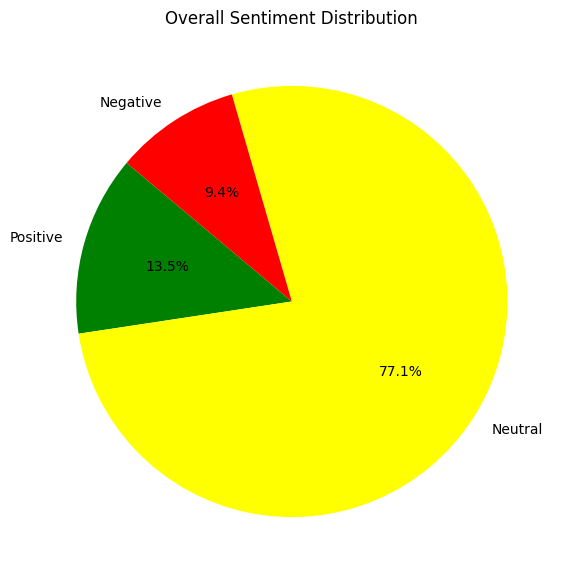

In [ ]:
# Step 8: Visualizing Sentiment
labels = ['Positive', 'Neutral', 'Negative']
sizes = [sentiment_score['pos'], sentiment_score['neu'], sentiment_score['neg']]
colors = ['green', 'yellow', 'red']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Overall Sentiment Distribution")
plt.show()

The pie chart provides a clear and visual representation of the overall sentiment distribution in user reviews of mobile applications.

In [ ]:
import nltk
from nltk.text import Text

# Assuming 'corpus_text' contains your corpus data
corpus_text = " ".join(corpus)  # If 'corpus' is a list of documents
text_object = Text(nltk.word_tokenize(corpus_text))

# Define your keywords
keywords = ['app', 'customer', 'money', 'time','experience','service']  # Add more as needed

# Perform KWIC analysis for each keyword
for keyword in keywords:
    print(f"KWIC for '{keyword}':")
    text_object.concordance(keyword, width=100, lines=5)  # Adjust width and lines as needed
    print("\n")

KWIC for 'app':
Displaying 5 of 152 matches:
which never reached us , and later when checked app it was canceled without our knowledge , reason 
to uninstall swiggy and opt zomato or any other app .. since we have lot of options available.Swigg
hole experience has been enhanced by the mobile app . I mean you could also use the desktop website
d also use the desktop website to order but the app is a much better option ! There has been a lot 
 ! There has been a lot of improvements on this app ever since and one huge upgrade I ’ ve felt per


KWIC for 'customer':
Displaying 5 of 68 matches:
                                        Worst customer service , uneducated rude employees , who doe
gs in my street . Thanks Swiggy for the great customer service ! ! Oh and thanks for 50rs coupon whi
u may keep it or give to someone else ! ! Bad Customer Service and technology by Swiggy I purchased 
 attempts to resolve the issue with Swiggy 's customer service team , my concerns were poorly handle


The KWIC (Key Word in Context) analysis provides valuable insights into how certain key terms are used in user reviews. By examining the words that appear before and after each keyword, we can identify trends, common concerns, and user sentiments.